# Import libraries

In [203]:
import pandas as pd
import numpy as np

# Topic Modelling
import gensim
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel

# Pipeline and utility functions
from req_libs import *
from pipeline import TopicModelling
from utils import text_prep_func

# Train file data preprocessing

In [2]:
trainfile = pd.read_csv('data/drugsComTrain_raw.csv')
trainfile['year'] = pd.DatetimeIndex(trainfile['date']).year

### BOW Model

#### Best n_topic selection

In [ ]:
best_n_selection = TopicModelling.BestTopicNumSelection(15, 45, 3, LdaModel, 'bow')

In [ ]:
k_scores, _ = best_n_selection.initiate_process(trainfile, 'review')
print(k_scores)

In [ ]:
best_model, best_n, best_score = best_n_selection.get_optimal_selection()

In [ ]:
best_n_selection.scores_line_plot()

#### Topic Modelling 

In [ ]:
topic_modelling = TopicModelling(trainfile, best_model)
topic_modelling.fit_corpus('review', 'bow')
topic_modelling.generate_topics()

In [ ]:
topic_modelling.topics_wordcloud(topn=25)

In [ ]:
topic_modelling.visualize_topics(25)

In [ ]:
# Low-dimensional embedding visualization
topic_modelling.tsne_clustering()

## TF-IDF Vectorizer

### Best n_topic selection

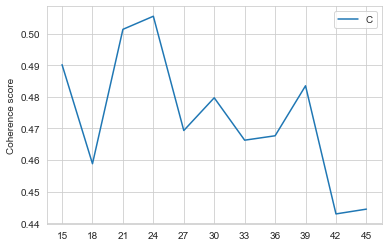

In [3]:
best_n_selection = TopicModelling.BestTopicNumSelection(15, 45, 3, LdaModel, 'tfidf')
scores, _ = best_n_selection.initiate_process(trainfile, 'review')
best_model, best_n, best_score = best_n_selection.get_optimal_selection()
best_n_selection.scores_line_plot()

### Topic Modelling with best number of topics

In [4]:
topic_modelling = TopicModelling(trainfile, best_model)
topic_modelling.fit_corpus('review', 'tfidf')
topic_modelling.generate_topics()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,...,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24
0,"""stomach""","""weight""","""quot""","""took""","""control""","""life""","""review""","""depression""","""work""","""infection""",...,"""work""","""mg""","""sleep""","""skin""","""pain""","""amp""","""year""","""migraine""","""month""","""pain"""
1,"""take""","""lb""","""generic""","""hour""","""birth""","""would""","""read""","""feel""","""sore""","""burning""",...,"""also""","""anxiety""","""night""","""acne""","""cramp""","""injection""","""blood""","""water""","""period""","""back"""
2,"""diarrhea""","""lost""","""brand""","""like""","""month""","""year""","""reading""","""anxiety""","""medicine""","""itching""",...,"""taking""","""attack""","""mg""","""using""","""day""","""year""","""month""","""mouth""","""pill""","""take"""
3,"""nausea""","""pound""","""name""","""time""","""period""","""recommend""","""people""","""year""","""cold""","""yeast""",...,"""make""","""panic""","""take""","""face""","""got""","""foot""","""insurance""","""taste""","""first""","""mg"""
4,"""drug""","""week""","""ring""","""day""","""sex""","""like""","""scared""","""week""","""well""","""bottle""",...,"""get""","""take""","""day""","""use""","""insertion""","""leg""","""pressure""","""drink""","""week""","""day"""
5,"""constipation""","""month""","""belviq""","""night""","""get""","""time""","""stuff""","""life""","""great""","""used""",...,"""take""","""day""","""morning""","""product""","""cramping""","""pain""","""doctor""","""headache""","""acne""","""year"""
6,"""bowel""","""eat""","""diet""","""take""","""year""","""get""","""l""","""mg""","""worked""","""time""",...,"""time""","""year""","""hour""","""week""","""mirena""","""week""","""hair""","""dry""","""day""","""relief"""
7,"""vomiting""","""started""","""fat""","""felt""","""got""","""say""","""u""","""like""","""allergy""","""first""",...,"""really""","""taking""","""wake""","""patch""","""painful""","""hand""","""medication""","""dose""","""started""","""work"""
8,"""bathroom""","""gain""","""share""","""one""","""drive""","""without""","""looking""","""started""","""throat""","""itch""",...,"""mg""","""xanax""","""sleeping""","""day""","""inserted""","""month""","""high""","""drinking""","""control""","""doctor"""
9,"""severe""","""gained""","""personality""","""went""","""shot""","""thing""","""forward""","""month""","""sinus""","""antibiotic""",...,"""day""","""help""","""taking""","""clear""","""bad""","""seizure""","""work""","""first""","""birth""","""help"""


In [5]:
topic_modelling.visualize_topics(25)

/Users/balaganesan/miniforge3/envs/nlpenv/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
22     0.068935 -0.173881       1        1  9.166368
23    -0.064901  0.088350       2        1  8.566359
7      0.066078 -0.016623       3        1  7.733320
3     -0.108539 -0.066210       4        1  6.144265
5     -0.029561  0.172998       5        1  5.959810
14     0.104299  0.100012       6        1  5.544694
4     -0.054089 -0.170308       7        1  4.835538
18    -0.001704 -0.269452       8        1  4.790406
20    -0.199678  0.065509       9        1  4.614233
13     0.185000 -0.152449      10        1  4.053742
17     0.251133 -0.054395      11        1  3.830256
15     0.191022  0.126129      12        1  3.768468
1      0.373014  0.006744      13        1  3.505120
10     0.313108 -0.197557      14        1  3.119432
2     -0.322925 -0.272377      15        1  2.914680
19    -0.124240 -0.387054      16        1  2.895996
0     -0.144409  0.324079      17        1  2.767261
9     -0.369299  0.068159      18        1  2.767014
16     0.167692  0.271488      19        1  2.659874
12     0.135867 -0.361338      20        1  2.566454
21     0.341427  0.258071      21        1  2.178035
11     0.004480  0.429127      22        1  2.096604
8     -0.319998  0.310332      23        1  1.765481
6     -0.462712 -0.099354      24        1  1.756589, topic_info=         Term         Freq        Total Category  logprob  loglift
376      quot  4320.000000  4320.000000  Default  25.0000  25.0000
2      effect  4369.000000  4369.000000  Default  24.0000  24.0000
6        side  4195.000000  4195.000000  Default  23.0000  23.0000
331      pain  7083.000000  7083.000000  Default  22.0000  22.0000
4          mg  5571.000000  5571.000000  Default  21.0000  21.0000
...       ...          ...          ...      ...      ...      ...
3857  running   112.113404   163.075813  Topic24  -4.8387   3.6671
1973     open   107.851736   155.426540  Topic24  -4.8774   3.6764
189      work   151.701824  5351.216597  Topic24  -4.5363   0.4786
225      know   119.441785  1560.384486  Topic24  -4.7754   1.4719
179      like   108.034285  5123.326776  Topic24  -4.8757   0.1827

[1378 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2022      8  0.994676   abdomen
203      19  0.999921   abilify
1720      2  0.005924   ability
1720     24  0.995208   ability
4863     18  1.001163  abnormal
...     ...       ...       ...
1100      1  1.001522       zit
2015     17  1.002642    zofran
239       3  0.921448    zoloft
239      12  0.076787    zoloft
1486     18  0.994520   zyprexa

[4694 rows x 3 columns], R=25, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[23, 24, 8, 4, 6, 15, 5, 19, 21, 14, 18, 16, 2, 11, 3, 20, 1, 10, 17, 13, 22, 12, 9, 7])

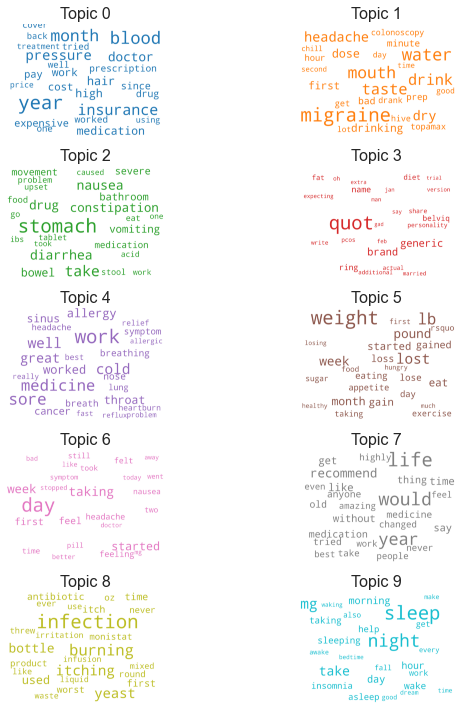

In [6]:
topic_modelling.topics_wordcloud(topn=25)

In [8]:
topic_modelling.assign_topic()

Topic assigned for all documents :)


# Topics trend over the years

In [9]:
trainfile.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,LDA_topic_assigned
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,2012,20
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,2010,14
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,2009,22
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,2015,22
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,2016,10


Topic trend over the years of top 20 topics

### Based on the occurence of topic number yearly

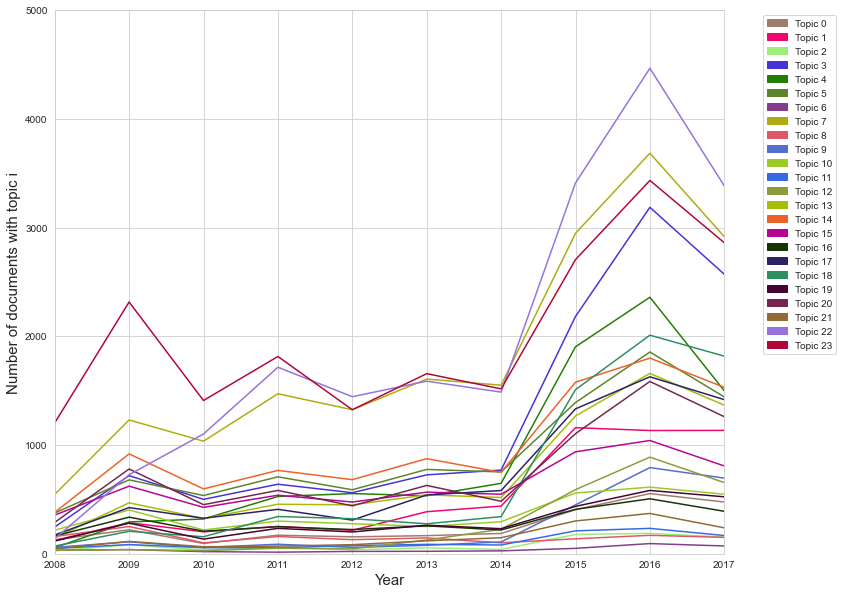

In [259]:
n_topics = len(trainfile.LDA_topic_assigned.unique())
df = trainfile[['year','LDA_topic_assigned']]
res = df.groupby(['year','LDA_topic_assigned'])['LDA_topic_assigned'].count()
res = pd.DataFrame(res)
res.rename(columns={'LDA_topic_assigned':'Count'})
my_dict = defaultdict(lambda: [0]*n_topics)
for i in range(len(res)):
    year, topic = res.iloc[i].name
    my_dict[year][topic] = res.iloc[i][0]   
p = pd.DataFrame.from_dict(dict(my_dict))
years = list(p.columns) 
plt.rcParams['figure.figsize'] = [12, 10]
plt.xlim(min(years), max(years))
plt.ylim(0,5000)
legend_dict = defaultdict(str)
patch_list = []
for i, l in enumerate(p.values):
    random_color = "#"+''.join([random.choice('ABCDEF0123456789') for _ in range(6)])
    legend_dict[f'Topic {i}'] = random_color
    plt.plot(list(p.columns), l, color=random_color)
patch_list = []
for key in legend_dict:
    data_key = mpatches.Patch(color=legend_dict[key], label=key)
    patch_list.append(data_key)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of documents with topic i', fontsize=15)
plt.legend(handles = patch_list, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.plot()
plt.show()